In [1]:
# import via notebook
#!mongoimport --type json -d wine -c ratings --drop --jsonArray clean_wine_data_final.json

In [2]:
# Importing Necessary Libraries
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [4]:
# confirm that our new database was created
mongo.list_database_names()

['admin',
 'air_b_and_b',
 'classDB',
 'config',
 'epa',
 'gardenDB',
 'local',
 'met',
 'petsitly_marketing',
 'sfairbnb',
 'uk_food',
 'wine']

In [5]:
db = mongo['wine']
db.list_collection_names()

['ratings']

In [6]:
#assign the collection to a variable
wine_df = db['ratings']

In [7]:
cursor = db["ratings"].find({})
json_data = list(cursor)

In [8]:
#Convery to a Pandas DataFrame
wine_df = pd.DataFrame(json_data)
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76736 entries, 0 to 76735
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              76736 non-null  object
 1   country          76736 non-null  object
 2   description      76736 non-null  object
 3   points           76736 non-null  int64 
 4   price            76736 non-null  int64 
 5   province         76736 non-null  object
 6   region           76736 non-null  object
 7   title            76736 non-null  object
 8   variety          76736 non-null  object
 9   winery           76736 non-null  object
 10  rating_category  76736 non-null  object
 11  type             73897 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.0+ MB


In [9]:
wine_df = wine_df.drop(['_id'], axis=1)

In [10]:
# Reorder Columns
reordered_df = wine_df[['price', 'points', 'rating_category', 'variety', 'type', 
                 'country', 'region', 'province', 'winery', 'description', 'title',]]
reordered_df

,price,points,rating_category,variety,type,country,region,province,winery,description,title
0,13,87,Very good,Riesling,White,US,Lake Michigan Shore,Michigan,St. Julian,"Pineapple rind, lemon pith and orange blossom ...",St. Julian 2013 Reserve Late Harvest Riesling ...
1,30,87,Very good,Malbec,Red,Argentina,Cafayate,Other,Felix Lavaque,"Baked plum, molasses, balsamic vinegar and che...",Felix Lavaque 2010 Felix Malbec (Cafayate)
2,19,87,Very good,Cabernet Sauvignon,Red,US,Napa Valley,California,Kirkland Signature,"Soft, supple plum envelopes an oaky structure ...",Kirkland Signature 2011 Mountain Cuvée Caberne...
3,13,87,Very good,Malbec,Red,Argentina,Mendoza,Mendoza Province,Gaucho Andino,Raw black-cherry aromas are direct and simple ...,Gaucho Andino 2011 Winemaker Selection Malbec ...
4,34,87,Very good,Cabernet Sauvignon,Red,US,Alexander Valley,California,Louis M. Martini,"Slightly reduced, this wine offers a chalky, t...",Louis M. Martini 2012 Cabernet Sauvignon (Alex...
...,...,...,...,...,...,...,...,...,...,...,...
76731,35,91,Outstanding,Cabernet Sauvignon,Red,US,Dry Creek Valley,California,Fritz,Fritz has made tremendous progress with Cab ov...,Fritz 2005 Cabernet Sauvignon (Dry Creek Valley)
76732,28,90,Outstanding,Pinot Gris,White,France,Alsace,Alsace,Domaine Rieflé-Landmann,"While it's rich, this beautiful dry wine also ...",Domaine Rieflé-Landmann 2013 Seppi Landmann Va...
76733,75,90,Outstanding,Pinot Noir,Red,US,Oregon,Oregon,Citation,Citation is given as much as a decade of bottl...,Citation 2004 Pinot Noir (Oregon)
76734,43,90,Outstanding,Malbec,Red,Argentina,San Juan,Other,Finca Las Moras,Raspberry and cassis aromas are fresh and upri...,Finca Las Moras 2010 Pedernal Malbec (San Juan)


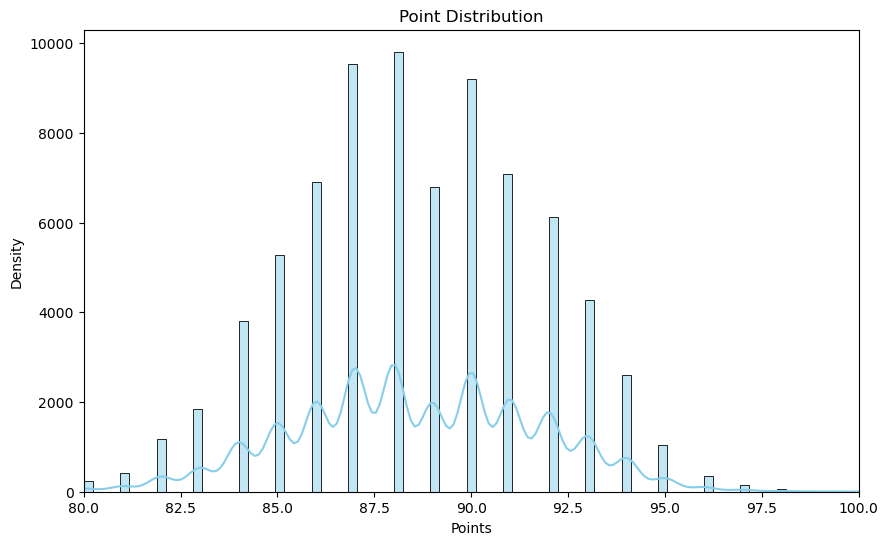

In [11]:
# create the density plot to see how points are distributed
plt.figure(figsize=(10, 6))
sns.histplot(reordered_df['points'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Density')
plt.title('Point Distribution')

# Set the x-axis limits
plt.xlim(80, 100)

plt.show()


In [12]:
# Calculate the total occurrences of each rating_category
rating_category_count = reordered_df['rating_category'].value_counts()
rating_category_count

rating_category
Very good      38320
Outstanding    29291
Good            7485
Classic         1640
Name: count, dtype: int64

In [13]:
rating_category_percentages = (rating_category_count / rating_category_count.sum() * 100).apply(lambda x: '{:.0f}%'.format(x))
rating_category_percentages

rating_category
Very good      50%
Outstanding    38%
Good           10%
Classic         2%
Name: count, dtype: object

In [14]:
grouped_counts = reordered_df.groupby(['type', 'rating_category']).size().reset_index(name='counts')
grouped_counts

,type,rating_category,counts
0,Red,Classic,1021
1,Red,Good,3641
2,Red,Outstanding,16599
3,Red,Very good,17801
4,Red Blend,Classic,275
5,Red Blend,Good,1164
6,Red Blend,Outstanding,5090
7,Red Blend,Very good,7507
8,Sparkling,Classic,26
9,Sparkling,Good,185


In [15]:
# Calculate the average price by points 
price_point_df = reordered_df.groupby("rating_category").agg({'price': 'mean'}).sort_values(by='price', ascending=False)
price_point_df

,price
rating_category,
Classic,138.182927
Outstanding,51.510327
Very good,28.508246
Good,20.216166


In [16]:
# Get the total count of all entries
total_count = reordered_df.shape[0]  # total number of rows in the dataset

# Calculate the count of each rating category
count_by_category = reordered_df['rating_category'].value_counts()

# Calculate the percentage of each category in the whole dataset
percentage_by_category = (count_by_category / total_count) * 100

# Create a DataFrame for easier joining
percentage_df = percentage_by_category.reset_index()
percentage_df.columns = ['rating_category', 'percentage']

# Add the percentage information to the previous DataFrame
price_point_with_percentage = pd.merge(price_point_df, percentage_df, on='rating_category')

print("Price and percentage by rating category:")
print(price_point_with_percentage)

Price and percentage by rating category:
  rating_category       price  percentage
0         Classic  138.182927    2.137198
1     Outstanding   51.510327   38.171132
2       Very good   28.508246   49.937448
3            Good   20.216166    9.754222


In [17]:
# Calculate the total counts for each 'type'
type_totals = grouped_counts.groupby('type')['counts'].sum().reset_index(name='total')

# Merge with grouped counts to get total counts for each 'type'
grouped_with_totals = pd.merge(grouped_counts, type_totals, on='type')

# Calculate the percentage for each 'rating_category' within each 'type'
grouped_with_totals['percentage'] = 100 * (grouped_with_totals['counts'] / grouped_with_totals['total'])
print(grouped_with_totals)

           type rating_category  counts  total  percentage
0           Red         Classic    1021  39062    2.613793
1           Red            Good    3641  39062    9.321079
2           Red     Outstanding   16599  39062   42.493984
3           Red       Very good   17801  39062   45.571143
4     Red Blend         Classic     275  14036    1.959248
5     Red Blend            Good    1164  14036    8.292961
6     Red Blend     Outstanding    5090  14036   36.263893
7     Red Blend       Very good    7507  14036   53.483899
8     Sparkling         Classic      26   1837    1.415351
9     Sparkling            Good     185   1837   10.070768
10    Sparkling     Outstanding     541   1837   29.450191
11    Sparkling       Very good    1085   1837   59.063691
12        White         Classic     313  17124    1.827844
13        White            Good    1790  17124   10.453165
14        White     Outstanding    6103  17124   35.640037
15        White       Very good    8918  17124   52.0789

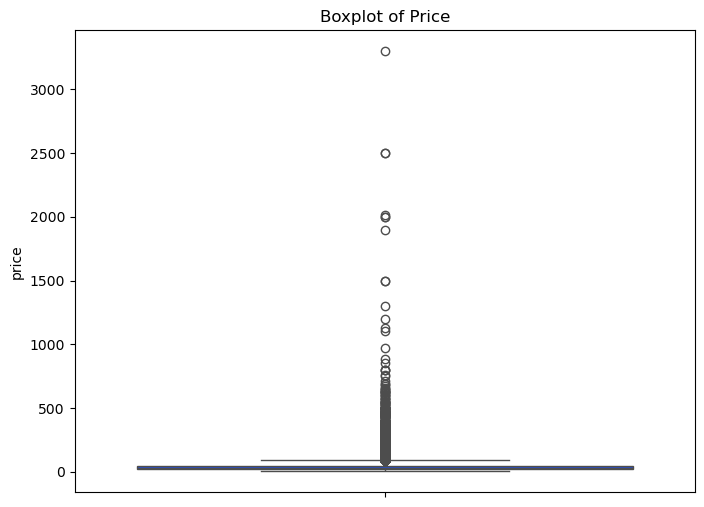

In [25]:
# Create a boxplot to visualize outliers in 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(data=reordered_df, y='price')
plt.title("Boxplot of Price")
plt.show()


In [27]:
# Calculate the first and third quartiles
Q1 = reordered_df['price'].quantile(0.25)  # First quartile (25th percentile)
Q3 = reordered_df['price'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the IQR method
outliers = reordered_df[(reordered_df['price'] < lower_bound) | (reordered_df['price'] > upper_bound)]

# Get the count of outliers
outlier_count = outliers.shape[0]

print("Number of Outliers in 'Price':", outlier_count)


Number of Outliers in 'Price': 3533


In [30]:
# Drop outliers from the DataFrame
reordered_df_no_outliers = reordered_df[(reordered_df['price'] >= lower_bound) & (reordered_df['price'] <= upper_bound)]

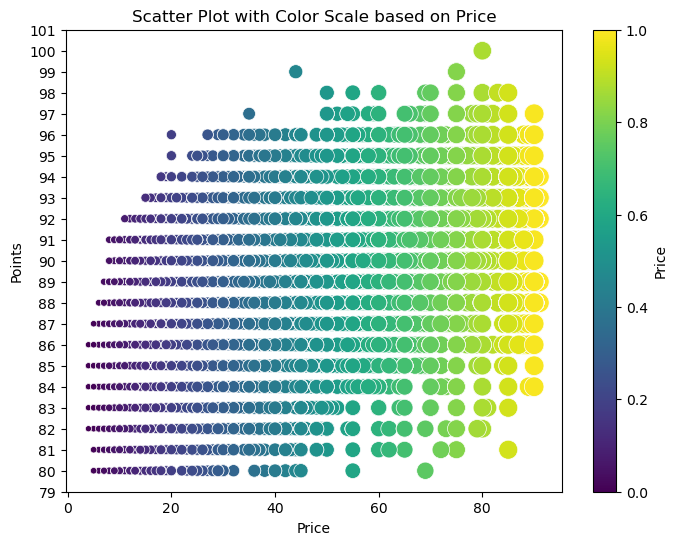

In [40]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Scatter plot with color scale based on 'price'
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    data=reordered_df_no_outliers,
    x='price',  # Using 'price' without logarithmic transformation
    y='points',
    hue='price',  # Color based on 'price'
    palette='viridis',  # Color palette for the scale
    size='price',  # Adjusting the marker size based on 'price'
    sizes=(20, 200),  # Size range for the markers
    legend=False
)

plt.xlabel('Price')  # Correct label for the x-axis
plt.ylabel('Points')
plt.title('Scatter Plot with Color Scale based on Price')

# Set y-axis to display only whole numbers
plt.gca().yaxis.set_major_locator(MultipleLocator(1))  # Major ticks at intervals of 1
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f'))  # Only whole numbers

# # Add a colorbar to represent the color scale for 'price'
plt.colorbar(scatter.collections[0], label='Price')

plt.show()


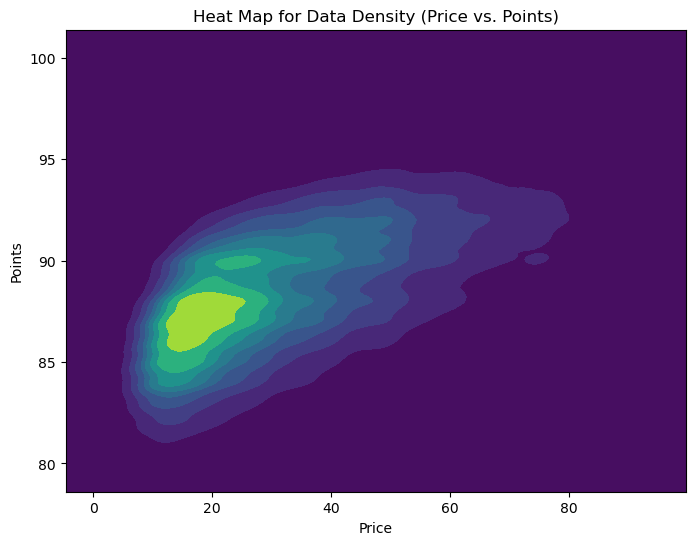

In [33]:
#
# reordered_df['price'] = np.log10(reordered_df['price'])

# Create a heat map to show the density of data
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=reordered_df_no_outliers,
    x='price',  
    y='points',
    cmap='viridis',  # Color map to represent density
    fill=True,  # Fill the area to create a heat effect
    thresh=0,  # Threshold for filling area
    levels=10  # Number of contour levels
)
plt.xlabel('Price')
plt.ylabel('Points')
plt.title("Heat Map for Data Density (Price vs. Points)")
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress FutureWarning

# Custom stop words
custom_stop_words = ['wine', 'flavor', 'flavors','notes', 'palate', 'finish', 'years', 'offers', 'texture', 'hint', 'hints', 'drink']

# Combine custom stop words with built-in English stop words
combined_stop_words = list(set(custom_stop_words).union(ENGLISH_STOP_WORDS))

# Initialize TF-IDF Vectorizer with combined stop words
tfidf_vectorizer = TfidfVectorizer(
    stop_words=combined_stop_words,
    ngram_range=(1,2),
    max_features=10
)

# Fit and transform the descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(reordered_df['description'])

# Get feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Function to get the top 3 keywords for each row
def get_top_3_keywords(row):
    # Get indices of the top N TF-IDF scores
    top_indices = np.argsort(row)[-10:]  

# Extract top 3 unique keywords
    unique_keywords = []
    for i in reversed(top_indices):
        keyword = feature_names[i]
        if keyword not in unique_keywords:
            unique_keywords.append(keyword)
        if len(unique_keywords) == 3:
            break  # Stop once we have 3 unique keywords
    
    return unique_keywords

# Apply the function to get the top 3 unique keywords for each row
reordered_df['top_3_keywords'] = tfidf_df.apply(get_top_3_keywords, axis=1)

print("Top 3 Keywords for each wine description:")
print(reordered_df[['top_3_keywords']])

Top 3 Keywords for each wine description:
                  top_3_keywords
0       [aromas, tannins, spice]
1            [red, oak, acidity]
2         [tannins, spice, ripe]
3           [oak, black, cherry]
4           [oak, black, cherry]
...                          ...
76731     [tannins, spice, ripe]
76732         [spice, red, ripe]
76733   [cherry, fruit, tannins]
76734   [aromas, tannins, spice]
76735  [spice, acidity, tannins]

[76736 rows x 1 columns]


/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_41299/478797688.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['top_3_keywords'] = tfidf_df.apply(get_top_3_keywords, axis=1)


In [42]:
from sklearn.preprocessing import LabelEncoder

# Flatten the list of top keywords to create a unique set of all keywords
unique_keywords = sorted(set([k for sublist in reordered_df['top_3_keywords'] for k in sublist]))

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder with the unique keywords
label_encoder.fit(unique_keywords)

# Encode the top 3 keywords into their label encoded form
reordered_df['top_3_keywords_encoded'] = reordered_df['top_3_keywords'].apply(
    lambda lst: label_encoder.transform(lst)
)

print("Label Encoded Top 3 Keywords:")
print(reordered_df[['top_3_keywords_encoded']])


Label Encoded Top 3 Keywords:
      top_3_keywords_encoded
0                  [1, 9, 8]
1                  [6, 5, 0]
2                  [9, 8, 7]
3                  [5, 2, 3]
4                  [5, 2, 3]
...                      ...
76731              [9, 8, 7]
76732              [8, 6, 7]
76733              [3, 4, 9]
76734              [1, 9, 8]
76735              [8, 0, 9]

[76736 rows x 1 columns]


/var/folders/38/_k6_rjgd5yl097bq5472r70h0000gn/T/ipykernel_41299/2346107333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reordered_df['top_3_keywords_encoded'] = reordered_df['top_3_keywords'].apply(


In [ ]:
# A copy of the code without all the custom stop words

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

# # Initialize TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(
#     stop_words='english',  # Remove common words like 'and', 'the', etc.
#     ngram_range=(1, 2),  # Extract unigrams and bigrams
#     max_features=10  # Adjustable
# )

# # Fit and transform the descriptions
# tfidf_matrix = tfidf_vectorizer.fit_transform(reordered_df['description'])

# # Get feature names (keywords)
# feature_names = tfidf_vectorizer.get_feature_names_out()

# # Create a DataFrame with TF-IDF scores
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# # Function to get the top N keywords from a row
# def get_top_keywords(row, n=3):
#     # Get indices of the top N TF-IDF scores
#     top_indices = np.argsort(row)[-n:]  # Last N indices in ascending order
#     # Get the corresponding keywords and reverse to get descending order
#     top_keywords = [feature_names[i] for i in reversed(top_indices)]
#     return top_keywords

# # Apply the function to each row to get the top 3 keywords
# reordered_df['top_3_keywords'] = tfidf_df.apply(lambda row: get_top_keywords(row, 3), axis=1)

# # Display the DataFrame with the new column
# print("DataFrame with Top 3 Keywords:")
# print(reordered_df[['top_3_keywords']])

In [43]:
# Create a new DataFrame with one-hot encoding for each keyword
one_hot_encoded = pd.get_dummies(reordered_df['top_3_keywords'].apply(pd.Series).stack()).groupby(level=0).sum()

# Combine the one-hot encoded DataFrame with the original DataFrame
reordered_df = pd.concat([reordered_df, one_hot_encoded], axis=1)

print("One-Hot Encoded Top 3 Keywords:")
print(reordered_df)

One-Hot Encoded Top 3 Keywords:
       price  points rating_category             variety   type    country  \
0         13      87       Very good            Riesling  White         US   
1         30      87       Very good              Malbec    Red  Argentina   
2         19      87       Very good  Cabernet Sauvignon    Red         US   
3         13      87       Very good              Malbec    Red  Argentina   
4         34      87       Very good  Cabernet Sauvignon    Red         US   
...      ...     ...             ...                 ...    ...        ...   
76731     35      91     Outstanding  Cabernet Sauvignon    Red         US   
76732     28      90     Outstanding          Pinot Gris  White     France   
76733     75      90     Outstanding          Pinot Noir    Red         US   
76734     43      90     Outstanding              Malbec    Red  Argentina   
76735     32      90     Outstanding          Pinot Gris  White     France   

                    region     

In [45]:
# Create a new column with a single string of keywords for simpler analysis
reordered_df['keywords_str'] = reordered_df['top_3_keywords'].apply(lambda lst: ','.join(lst))

# Group by 'type' and 'rating_category'
grouped_df = reordered_df.groupby(['type', 'rating_category'])

# Create a function to apply 'value_counts' on 'keywords_str'
def count_keywords(series):
    # Flatten the list of strings into individual keywords
    keywords = []
    for k_str in series:
        keywords.extend(k_str.split(','))
    return pd.Series(keywords).value_counts()

# Apply the function to each group to get value counts
keyword_counts_by_group = grouped_df['keywords_str'].apply(count_keywords)

print("Keyword counts by 'type' and 'rating_category':")
print(keyword_counts_by_group)

Keyword counts by 'type' and 'rating_category':
type         rating_category         
Red          Classic          tannins    610
                              spice      492
                              black      416
                              cherry     308
                              ripe       282
                                        ... 
White Blend  Very good        acidity    350
                              oak        100
                              red         18
                              black        1
                              cherry       1
Name: keywords_str, Length: 188, dtype: int64
